<a href="https://colab.research.google.com/github/Yudaeun/Data_Analysis/blob/main/Prevention_of_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

In [1]:
import numpy as np

In [3]:
matrix_a=np.asarray([[4,5,2],
                    [5,2,6],
                    [6,1,-2]])
matrix_b=np.asarray([[5,9,2],
                     [2,0,3],
                     [1,-4,5]])
matrix_c=matrix_a+matrix_b
print(matrix_c)

[[ 9 14  4]
 [ 7  2  9]
 [ 7 -3  3]]


Numpy는 파이썬에서 가장 많이 쓰이고 있는 벡터나 행렬같은 수학적인 데이터 구조를 표현하고 연산하는 기본적인 기능이 효율적으로 구현되어 있는 수치 계산 라이브러리이다.

# Pandas 

Pandas는 numpy를 기반으로 고차원적인 데이터 처리를 할 수 있는 라이브러리이다. 동일한 데이터를 가진 Series를 기본으로 하고, 이를 여러개 묶어서 사용하는 DataFrame을 사용해서 표 형태로 된 자료를 다룬다.

In [4]:
import pandas as pd

In [5]:
col_id=pd.Series(data=[5,14,21,25])
col_team=pd.Series(data=['A','B','B','A'])
col_name=pd.Series(data=['루루','나나','미미','시루'])
col_score=pd.Series(data=[100,95,60,80])

df=pd.DataFrame(data={'Id':col_id,
                      'Team':col_team,
                      'Name':col_name,
                      'Scroe':col_score})
df.set_index('Id',inplace=True)
df

,Team,Name,Scroe
Id,,,
5,A,루루,100
14,B,나나,95
21,B,미미,60
25,A,시루,80


In [6]:
df.groupby('Team').mean()

,Scroe
Team,
A,90.0
B,77.5


팀별 score 평균을 나타낸다.

# Matplotlib

Matplotlib는 파이썬에서 매트랩(매트랩 단어보니 속 안 좋아진다.) 스타일의 그래프를 그리기 위해 만들어진 오픈소스 패키지이다. 자세한 내용은 [matplotlib.org](https://matplotlib.org)에서 확인

In [7]:
import matplotlib.pyplot as plt

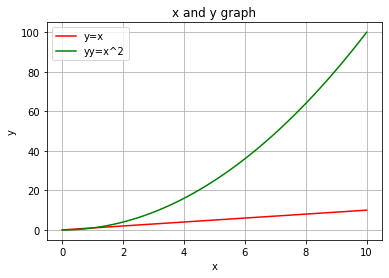

In [13]:
x=np.linspace(0,10,100)
y=x
yy=x ** 2

fig=plt.figure()
ax=fig.gca() # 좌표축
ax.plot(x,y,'r-')
ax.plot(x,yy,'g-')
ax.set_title('x and y graph')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(['y=x','yy=x^2'])
ax.grid()
fig.show()


0부터 10까지 1을 간격으로 100개의 1차원 배열이 만들어지고 그것을 바탕으로 그래프를 그린다. yy는 x^2이고 y=x 

# 의료 데이터를 분석해 심부전증 예방이 가능할까?

# 1. DataSet 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Kaggle API Setting

In [15]:
import os

In [16]:
os.environ['KAGGLE_USERNAME']='yudaeun0918'
os.environ['KAGGLE_KEY']='private key'